In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('AllProductReviews.csv')

In [3]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [4]:
df.shape

(14337, 4)

In [5]:
df = df[df.ReviewStar != 3]

In [6]:
df.shape

(12834, 4)

In [7]:
def partition(x):
    if x <= 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = df['ReviewStar']
positiveNegative = actualScore.map(partition) 
df['ReviewStar'] = positiveNegative



In [8]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",0,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",1,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,0,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,1,boAt Rockerz 255
5,Charging port not working\n,"After 11 days, the charging port isn't working...",0,boAt Rockerz 255


In [9]:
df.shape


(12834, 4)

In [10]:
final=df.drop_duplicates(subset={"Product","ReviewBody","ReviewTitle"}, keep='first', inplace=False)
final.shape

(12404, 4)

In [11]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",0,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",1,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,0,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,1,boAt Rockerz 255
5,Charging port not working\n,"After 11 days, the charging port isn't working...",0,boAt Rockerz 255


In [12]:
final_data=final[0:1000]

In [13]:
def textCleaning(df):
    tokens = []
    df=pd.DataFrame(df)
    for i in range(len(df)):
        tokens.append(word_tokenize(df['ReviewBody'].iloc[i]))

    stopwordsList = stopwords.words("english")
    stopwordsList.extend([',','.','-','!'])

    wordsList = []
    for tokenList in tokens:
        words = []
        for word in tokenList:
            if word.lower() not in stopwordsList:
                words.append(word.lower())
        wordsList.append(words)

    wnet = WordNetLemmatizer()
    for i in range(len(wordsList)):
        for j in range(len(wordsList[i])):
            wordsList[i][j] = wnet.lemmatize(wordsList[i][j], pos='v')

    for i in range(len(wordsList)):
        wordsList[i] = ' '.join(wordsList[i])

    return wordsList


In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
wordlist=textCleaning(final_data)

In [15]:
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn
final_counts = count_vect.fit_transform(final_data['ReviewBody'].values)
final_counts=final_counts.toarray()

In [16]:
y = np.array(final_data['ReviewStar'])

from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler(with_mean= False ).fit_transform(final_counts)

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



The optimal alpha is 1.


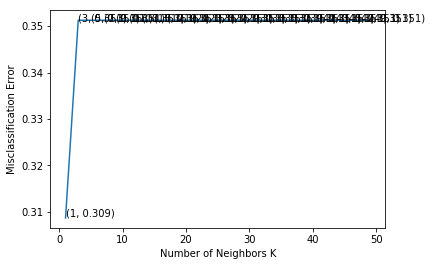

the misclassification error for each k value is :  [0.309 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351
 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351 0.351
 0.351]


In [17]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(standardised_data,y,test_size=0.2, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    clf = BernoulliNB(alpha=k, binarize=0.0, fit_prior=True, class_prior=None)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [18]:
clf_optimal = BernoulliNB(alpha=1, binarize=0.0 , fit_prior=False, class_prior=[1,1])

In [19]:
# fitting the model
clf_optimal.fit(X_train, y_train)

BernoulliNB(alpha=1, binarize=0.0, class_prior=[1, 1], fit_prior=False)

In [20]:
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print(acc)

70.5


In [25]:
from sklearn.metrics import confusion_matrix
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)
print(clf_optimal.coef_)
# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
matrix = confusion_matrix(y_test, pred) 
tn,fp,fn,tp= confusion_matrix(y_test, pred).ravel()
print(tn,fp,fn,tp)
precision=tp/(tp+fp)
recall=tp/(fn+tp)
f1=(2*((precision*recall)/(precision+recall)))
print("recall is:",recall)
print("precision is:",precision)
print("f1 score is:",f1)

print(matrix)


[[-6.06610809 -6.06610809 -5.37296091 ... -6.06610809 -6.06610809
  -6.06610809]]
58 33 9 100
recall is: 0.9174311926605505
precision is: 0.7518796992481203
f1 score is: 0.8264462809917356
[[ 58  33]
 [  9 100]]


In [26]:
review=input()
df = pd.DataFrame()
df['ReviewBody'] = [review]
wordList = textCleaning(df)

mesmerizing movie


In [27]:
vect = count_vect.transform(wordList)
vect=vect.toarray()

In [28]:
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler(with_mean= False ).fit_transform(vect)

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
pred = clf_optimal.predict(standardised_data)
print(pred)

[1]


In [30]:
if pred[0] == 1:
    print("Positive")
else:
    print("Negative")

Positive
